## Task 2

### Problem Statement

In the given problem we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables 

'`Hours`' : the number of hours a student studies (independent/ predictor variable)

'`Score`' : the marks scored by a student (dependent/ target variable)

1. What is Linear Regression?
2. Why Linear Regression?

A. Linear Regression is a type of supervised machine learning algorithm(labelled data), in linear regression the output variable is continuous.

A. Linear Regression is very widely used as it is easy to understand and it shows the relation between the independent variable and dependent variable

**Equation of Linear Regression**

$ y =\beta_0 + \beta_1 x$

here,

y is the dependent variable

x is the independent variable

$\beta_0$ and $\beta_1$ are the coefficients of Linear Regression


In [1]:
# path of the file
path ="http://bit.ly/w-data"

In [3]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
# loading the csv_data
data =pd.read_csv(path)

In [5]:
# Observing the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# statistics of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Since the data does not contain null values we can move forward if null value exists we need to treat them

### Visualizing the data

We can observe a linear trend in the data as the number of hours increases the marks increases this happens due to the correlation between the feature and the target variable

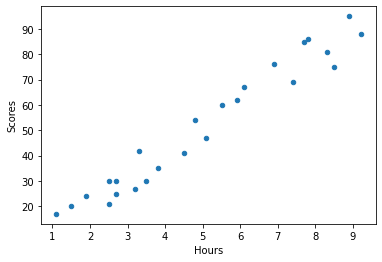

In [21]:
data.plot(kind ='scatter', x='Hours', y='Scores')

In [22]:
data_corr =data.corr()

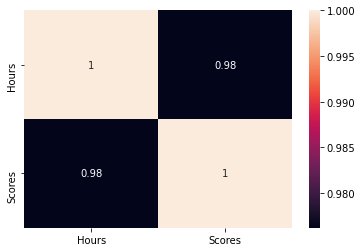

In [23]:
sns.heatmap(data_corr, annot=True)

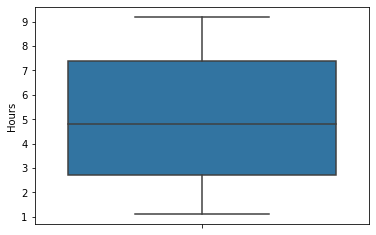

In [44]:
sns.boxplot(data['Hours'], orient='v')

We can see from the boxplots outliers does not exists in the data all the data lie within IQR(Inter Quartile Range) and hence no outlier treatment is required

**Seperating features and targets**

In [15]:
X =data['Hours'].values
y =data['Scores'].values

In [16]:
X =X.reshape(-1,1)

In [17]:
# performing train_test split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size =0.2, random_state =0)

In [18]:
# Creating a linear regressor object
linreg =LinearRegression()

In [19]:
# Training the model
linreg.fit(X_train,y_train)

LinearRegression()

In [52]:
b_0 =linreg.intercept_
b_1 =linreg.coef_

print("The coefficients of the Linear Regression are {0} {1}".format(b_0,b_1))

The coefficients of the Linear Regression are 2.018160041434662 [9.91065648]


### Predicting with the model

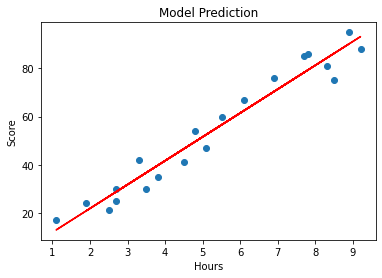

In [54]:
# checking the model performance on train data
y_train_pred =b_0 +b_1*X_train # predicting y_train using the model
plt.scatter(x =X_train, y=y_train)
plt.plot(X_train, y_train_pred ,'r')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Model Prediction")
plt.show()

In [55]:
# predicting using the model on test data
y_pred =linreg.predict(X_test)

In [56]:
prediction_df =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [64]:
hours_pred =[[9.25]]
predictions =linreg.predict(hours_pred)
print("The predicted score when a student studies 9.25hrs is ",predictions[0])

The predicted score when a student studies 9.25hrs is  93.69173248737539


### Evaluating the model

In [65]:
mae =mean_absolute_error(y_test, y_pred)
mse =mean_squared_error(y_test, y_pred)
R_squared =r2_score(y_test, y_pred)

print("Mean absolute error %.2f"%mae)
print("Mean squared error %.2f"%mse)
print("R_Squared %.2f"%R_squared)

Mean absolute error 4.18
Mean squared error 21.60
R_Squared 0.95


R_squared value above 0.6 is good to go and hence the model performance is good